# 🎓 **Taller 2.2: Análisis de Valores Faltantes - Dataset Remax**


## OBJETIVOS DEL TALLER:
* ✅Cuantificar y visualizar valores faltantes por columna y en porcentajes
* ✅ Analizar patrones de las columnas con datos faltantes
* ✅ Analizar el tipo de valor faltante (MCAR, MAR, MNAR)
* ✅ Aplicar técnicas de imputación
* ✅ Evaluar el impacto de las imputaciones

## 📝 INSTRUCCIONES PARA ENTREGA:

1. **GUARDA ESTE NOTEBOOK** en tu Google Drive siguiendo esta convencion para el nombre del archivo:  NombreApellidoTemaDataset.ipynb
2. **COMPLETA TODOS LOS TODOs** en las celdas siguientes
3. **EJECUTA TODAS LAS CELDAS** y verifica que funcionen

🎓 **RÚBRICA DE EVALUACIÓN:**
- ✅ Código completo y funcional (50%)
- ✅ Análisis correcto de estadísticas (30%)
- ✅ Visualizaciones adecuadas (10%)
- ✅ Reporte claro de hallazgos (10%)

# 🔧 **CONFIGURACIÓN INICIAL**

In [22]:
# Configuración e importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Montar Google Drive
drive.mount('/content/drive')
CURSO = "AprendizajeAutomatico2025"
BASE_FOLDER = "/content/drive/MyDrive/Colab Notebooks"
RUTA_CURSO = os.path.join(BASE_FOLDER, CURSO)

# Crear directorio
os.makedirs(BASE_FOLDER, exist_ok=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 📁 **LECTURA DEL DATASET**

In [24]:
# Cargar dataset Remax
def cargar_dataset():
    try:
      path = RUTA_CURSO + '/data/remax.dat'
      df = pd.read_csv(path, sep=';', index_col=0, engine='python')
      return df
    except:
        try:
            # Intentar cargar desde URL alternativa
            url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/02-PREPROCESAMIENTO/data/datos_propiedades_ecuador.dat"
            df = pd.read_csv(url, sep=';', index_col=0, engine='python')
            print("✅ Dataset cargado desde URL GitHub")
            return df
        except:
            print("❌ No se pudo cargar el dataset")
            return pd.DataFrame()

In [25]:
# Cargar dataset
df = cargar_dataset()

if df is not None:
    print(f"📊 Dataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas")
    print("🔍 Primeras filas:")
    display(df.head())
else:
    print("⚠️ No se pudo cargar el dataset. Revisa la ruta en Drive.")

✅ Dataset cargado desde URL GitHub
📊 Dataset cargado: 4555 filas, 71 columnas
🔍 Primeras filas:


,_id,estado,direccion,Aeropuerto,Aestrenar,Agua,Alarma,Alcantarillado,Amoblado,Ano Construcción,...,NoDorm,NoMetros,estadoTran,lat,lng,precio,price,tipoInv,tipoTran,titulo
0,700a3c679fc98a495a6598aad4fed54bd4370fdb---Usa...,Usada,Ñusta - Calle Lira Ñan - Causayllacta - Quitum...,0,0,0,0,1,0,2008,...,3,93,NaN,0.000000,0.000000,65000.0,"65,000",Departamento,De Venta,Ñusta - Calle Lira Ñan - Causayllacta - Qu...
1,fa0ab90a2960f49706bfd7eae09558b399b18ad8---Usa...,Usada,Condor Ñan - Conjunto Sol del Sur - Ruccullact...,0,0,0,0,0,0,2008,...,3,88,NaN,0.000000,0.000000,60000.0,"60,000",Departamento,De Venta,Condor Ñan - Conjunto Sol del Sur - Rucculla...
2,dc32d6017e02ba8c61cdaf3454aa9c21d2489463---Usa...,Usada,Av Pedro V Maldonado - Conjunto Portal de Chim...,0,0,1,0,1,1,2000,...,2,46,NaN,0.000730,-0.001073,47000.0,"47,000",Departamento,De Venta,Av Pedro V Maldonado - Conjunto Portal de Chi...
3,f43847d841c74c009079d9759d0f10a648423183---Usa...,Usada,"Cusubamba - Turubamba Bajo - Solanda, Ecuador",0,0,0,1,0,1,2012,...,7,432,NaN,-0.277858,-78.539948,215000.0,"215,000",Casa,De Venta,"Cusubamba - Turubamba Bajo - Solanda, Ecuador"
4,fe89e3b31b9f32bfd3cf142e4983eca6ecd95adb---Usa...,Usada,Rocafuerte - Edificio Casa Ponton - Centro His...,0,0,0,1,0,0,2010,...,3,71,NaN,0.000000,0.000000,59500.0,"59,500",Departamento,De Venta,Rocafuerte - Edificio Casa Ponton - Centro ...


# 🎯 **EJERCICIO 1: ANÁLISIS GENERAL DE VALORES FALTANTES**

In [26]:
def analisis_valores_faltantes(df):
    analisis = {}
    # TODO 1.1: Calcular las columnas que tienen valores faltantes
    missing_summary = df.isnull().sum() # ← COMPLETAR

    # TODO 1.2: Calcular el porcentaje de valores faltantes por columna
    missing_percent = (df.isnull().sum() / len(df)) * 100  # ← COMPLETAR

    # TODO 1.3: Crear un dataframe solo con las columas y filas que tienen valores faltantes
    missing_info = pd.DataFrame({'Valores_Faltantes': missing_summary, 'Porcentaje_Faltante': missing_percent})  # ← COMPLETAR
    missing_info = missing_info[missing_info['Valores_Faltantes'] > 0].sort_values(by='Porcentaje_Faltante', ascending=False) # ← COMPLETAR - FILTRAR solo columnas con valores faltantes
    return missing_info

In [27]:
# Ejecutar funciones
print("🔍 Ejecutando análisis de valores faltantes...")
dfValoresFaltantes = analisis_valores_faltantes(df)
dfValoresFaltantes

🔍 Ejecutando análisis de valores faltantes...


,Valores_Faltantes,Porcentaje_Faltante
estadoTran,4331,95.082327
estado,2622,57.563117
Terreno,1728,37.936334
Area Construcción,1259,27.639956
tipoTran,3,0.065862
Total M²,1,0.021954


In [28]:
def grafico_distribucion_faltantes(df):
    # TODO : Graficar un mapa de calor de los Valores Faltantes
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Distribución de Valores Faltantes')
    plt.xlabel('Columnas')
    plt.ylabel('Filas')
    plt.show()

🔍 DISTRIBUCION DE VALORES FALTANTES


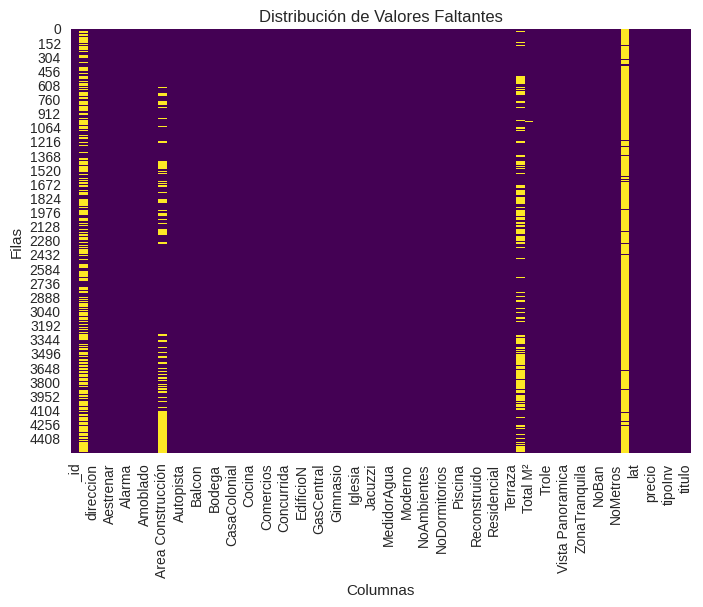

In [29]:
# Análisis para variables específicas
print("🔍 DISTRIBUCION DE VALORES FALTANTES")
grafico_distribucion_faltantes(df)

### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

1.- ¿Qué columnas tienen el mayor porcentaje de valores faltantes?

-> **estadoTran**: 95.08%
-> **estado**: 57.56%
-> **Terreno**: 37.94%
-> **Area Construcción**: 27.64%

2.- ¿Existe algún patrón visible en la matriz de valores faltantes? Describa el patrón.

Al analizar el mapa de calor (sns.heatmap(df.isnull())), se notan franjas verticales en columnas como **estadoTran, estado, Terreno y Área Construcción**, lo que revela que muchas filas no tienen datos en esos campos. Si además algunas franjas coinciden horizontalmente, significa que existen grupos de registros donde faltan varios datos a la vez, posiblemente porque pertenecen a un tipo de propiedad o a un periodo en el que no se registró toda la información.

3.- ¿Hay correlaciones entre los valores faltantes de diferentes columnas? Describa las correlaciones.

Es probable que haya relación entre los valores faltantes, sobre todo entre **estadoTran** y **estado**, y también entre **Terreno** y **Área Construcción**. Si en el mapa de calor las mismas filas aparecen oscuras en varias de estas columnas, significa que cuando falta un dato en una, suele faltar también en la otra. Esto puede deberse a dos causas:

* **Relación entre columnas:** por ejemplo, si *estadoTran* y *estado* describen aspectos similares de la propiedad, ambos podrían faltar cuando esa información no aplica.
* **Fallas en la recolección de datos:** puede que ciertos tipos de propiedades (como terrenos sin construcción) no tuvieran datos de *Terreno* o *Área Construcción* porque no eran relevantes o no se registraron.


# 🔄 **EJERCICIO 2: ANÁLISIS MULTIVARIABLE DE ATRIBUTOS NUMERICOS**

In [30]:
def analisis_multivariable(df):
    """
    Realiza análisis de relaciones entre variables numericas
    """
    print("🔍 INICIANDO ANÁLISIS MULTIVARIABLE")

    # TODO 2.1: Matriz de correlación para variables numéricas
    print("1. MATRIZ DE CORRELACIÓN:")
    correlation_matrix = df.select_dtypes(include=np.number).corr()  # ← COMPLETAR
    print(correlation_matrix)

    # TODO 2.2: Visualizar matriz de correlación
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") # ← COMPLETAR
    plt.title('Matriz de Correlación - Variables Numéricas')
    plt.show()

🔍 INICIANDO ANÁLISIS MULTIVARIABLE
1. MATRIZ DE CORRELACIÓN:
                Aeropuerto  Aestrenar      Agua    Alarma  Alcantarillado  \
Aeropuerto        1.000000   0.043580  0.226434  0.091897        0.174131   
Aestrenar         0.043580   1.000000  0.055431  0.138934        0.058481   
Agua              0.226434   0.055431  1.000000  0.099533        0.752246   
Alarma            0.091897   0.138934  0.099533  1.000000        0.078715   
Alcantarillado    0.174131   0.058481  0.752246  0.078715        1.000000   
...                    ...        ...       ...       ...             ...   
NoBan             0.034770  -0.050321  0.116138  0.118744        0.096470   
NoDorm            0.015644  -0.050109  0.117992  0.086505        0.102074   
lat              -0.019456  -0.008156 -0.025314  0.024617       -0.023849   
lng              -0.079188  -0.053115 -0.109250 -0.040333       -0.072445   
precio            0.000464  -0.014562  0.011571  0.035355        0.017334   

              

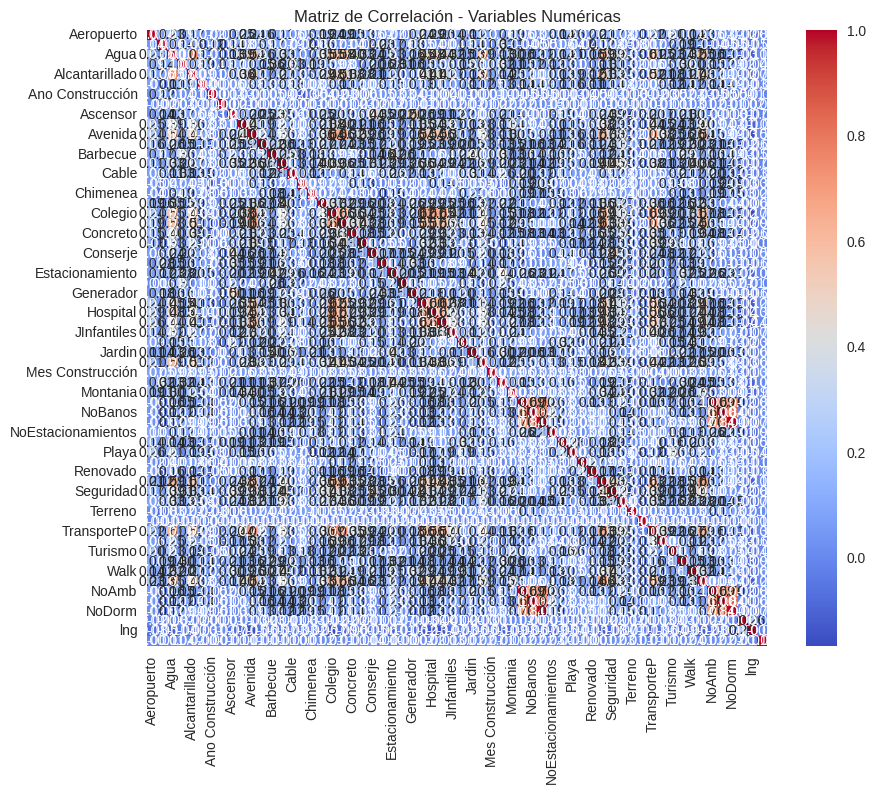

In [38]:
# Ejecutar análisis multivariable
analisis_multivariable(df)

¿Los valores faltantes son MCAR, MAR o MNAR?

estadoTran y estado (95.08% y 57.56% faltantes): Es muy probable que sean MNAR (Missing Not at Random) o MAR (Missing at Random). Dado el altísimo porcentaje de faltantes, especialmente en estadoTran, sugiere que la ausencia del dato puede estar directamente relacionada con la naturaleza de la propiedad o la transacción misma. Por ejemplo, si un tipo de propiedad no tiene 'estado de transacción' o 'estado de propiedad' porque no aplica o porque se recolectó esa información solo para un subconjunto específico de propiedades.

Terreno y Area Construcción (37.94% y 27.64% faltantes): Estos parecen ser MAR (Missing at Random). Hay una fuerte indicación de que la falta de uno predice la falta del otro. Por ejemplo, si es un 'Terreno' (solar sin construir), la 'Área Construcción' estaría en blanco. O viceversa, si es una 'Casa', 'Terreno' suele estar presente. La ausencia de datos aquí probablemente no es aleatoria, sino que depende de otra variable que sí observamos (como el tipo de propiedad).

tipoTran (0.065% faltante) y Total M² (0.021% faltante): Con un porcentaje tan bajo, estos podrían ser MCAR (Missing Completely at Random). Es decir, su ausencia podría deberse a pequeños errores aleatorios en la entrada de datos que no están sistemáticamente relacionados con otras variables ni con el valor que debería haber estado allí.

¿Qué variables podrían predecir la presencia de valores faltantes?

Basado en nuestro análisis, las variables que podrían predecir la presencia de valores faltantes son:

El tipo de propiedad: Una variable que categorice la propiedad como 'Casa', 'Apartamento', 'Terreno' o 'Local Comercial' sería un fuerte predictor. Por ejemplo, los 'terrenos' no tendrían 'Área Construcción'.
Otras características de la propiedad: Cualquier otra característica que defina la naturaleza o el uso principal de la propiedad. Por ejemplo, si la propiedad es 'nueva' o 'usada', si es para 'venta' o 'alquiler', etc., podría influir en qué campos son relevantes y, por tanto, se llenan.
Variables temporales/fuente de datos: La fecha de registro o la fuente de los datos podrían indicar si ciertos campos no se registraban en ciertas épocas o por ciertos agentes, lo que llevaría a patrones de datos faltantes.

# 🔄 **EJERCICIO 3: IMPUTAR LOS VALORES FALTANTES**

### **EJERCICIO 3: IMPUTACIÓN DE VALORES FALTANTES**

In [33]:
# Columnas identificadas con valores faltantes:
missing_cols_info = dfValoresFaltantes.index.tolist()
print(f"Columnas con valores faltantes a imputar: {missing_cols_info}")

# Imputación para 'estadoTran' y 'estado' (categóricas con alto % de faltantes)
# Imputamos con 'Desconocido' para preservar la información de que el dato original estaba ausente
if 'estadoTran' in df.columns:
    df['estadoTran'] = df['estadoTran'].fillna('Desconocido')
    print("✅ 'estadoTran' imputado con 'Desconocido'")
if 'estado' in df.columns:
    df['estado'] = df['estado'].fillna('Desconocido')
    print("✅ 'estado' imputado con 'Desconocido'")

# Imputación para 'Terreno', 'Area Construcción' y 'Total M²' (numéricas)
# Usamos la mediana para ser robustos a outliers
for col in ['Terreno', 'Area Construcción', 'Total M²']:
    if col in df.columns:
        # Limpiar y convertir a numérico antes de calcular la mediana
        # Reemplazar comas por puntos y luego convertir a float
        df[col] = df[col].astype(str).str.replace(',', '.', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce')

        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)
        print(f"✅ '{col}' imputado con la mediana ({median_value})")

# Imputación para 'tipoTran' (categórica con bajo % de faltantes)
# Usamos la moda (valor más frecuente)
if 'tipoTran' in df.columns:
    mode_value = df['tipoTran'].mode()[0]
    df['tipoTran'] = df['tipoTran'].fillna(mode_value)
    print(f"✅ 'tipoTran' imputado con la moda ({mode_value})")


# Verificar si aún hay valores faltantes
print("\nVerificación final de valores faltantes después de la imputación:")
missing_after_imputation = df.isnull().sum()
missing_after_imputation = missing_after_imputation[missing_after_imputation > 0]

if missing_after_imputation.empty:
    print("🎉 ¡Todos los valores faltantes han sido imputados exitosamente!")
else:
    print("⚠️ Aún quedan valores faltantes en las siguientes columnas:")
    print(missing_after_imputation)

# Mostrar un resumen de las primeras filas del DataFrame modificado
print("\nPrimeras filas del DataFrame después de la imputación:")
display(df.head())

Columnas con valores faltantes a imputar: ['estadoTran', 'estado', 'Terreno', 'Area Construcción', 'tipoTran', 'Total M²']
✅ 'estadoTran' imputado con 'Desconocido'
✅ 'estado' imputado con 'Desconocido'
✅ 'Terreno' imputado con la mediana (160.0)
✅ 'Area Construcción' imputado con la mediana (158.685)
✅ 'Total M²' imputado con la mediana (200.0)
✅ 'tipoTran' imputado con la moda (De Venta)

Verificación final de valores faltantes después de la imputación:
🎉 ¡Todos los valores faltantes han sido imputados exitosamente!

Primeras filas del DataFrame después de la imputación:


,_id,estado,direccion,Aeropuerto,Aestrenar,Agua,Alarma,Alcantarillado,Amoblado,Ano Construcción,...,NoDorm,NoMetros,estadoTran,lat,lng,precio,price,tipoInv,tipoTran,titulo
0,700a3c679fc98a495a6598aad4fed54bd4370fdb---Usa...,Usada,Ñusta - Calle Lira Ñan - Causayllacta - Quitum...,0,0,0,0,1,0,2008,...,3,93,Desconocido,0.000000,0.000000,65000.0,"65,000",Departamento,De Venta,Ñusta - Calle Lira Ñan - Causayllacta - Qu...
1,fa0ab90a2960f49706bfd7eae09558b399b18ad8---Usa...,Usada,Condor Ñan - Conjunto Sol del Sur - Ruccullact...,0,0,0,0,0,0,2008,...,3,88,Desconocido,0.000000,0.000000,60000.0,"60,000",Departamento,De Venta,Condor Ñan - Conjunto Sol del Sur - Rucculla...
2,dc32d6017e02ba8c61cdaf3454aa9c21d2489463---Usa...,Usada,Av Pedro V Maldonado - Conjunto Portal de Chim...,0,0,1,0,1,1,2000,...,2,46,Desconocido,0.000730,-0.001073,47000.0,"47,000",Departamento,De Venta,Av Pedro V Maldonado - Conjunto Portal de Chi...
3,f43847d841c74c009079d9759d0f10a648423183---Usa...,Usada,"Cusubamba - Turubamba Bajo - Solanda, Ecuador",0,0,0,1,0,1,2012,...,7,432,Desconocido,-0.277858,-78.539948,215000.0,"215,000",Casa,De Venta,"Cusubamba - Turubamba Bajo - Solanda, Ecuador"
4,fe89e3b31b9f32bfd3cf142e4983eca6ecd95adb---Usa...,Usada,Rocafuerte - Edificio Casa Ponton - Centro His...,0,0,0,1,0,0,2010,...,3,71,Desconocido,0.000000,0.000000,59500.0,"59,500",Departamento,De Venta,Rocafuerte - Edificio Casa Ponton - Centro ...


# 🔄 **EJERCICIO 4: ANÁLISIS MULTIVARIABLE DE ATRIBUTOS CATEGORICOS**

In [34]:
# aplique el Chi-cuadrado (χ2) para determinar la relacion entre dos de los atributos categoricos
from scipy.stats import chi2_contingency

print("🔍 INICIANDO ANÁLISIS MULTIVARIABLE DE ATRIBUTOS CATEGÓRICOS")
print("1. Prueba de Chi-cuadrado (χ²) entre 'estadoTran' y 'estado':")

# Crear tabla de contingencia
contingency_table = pd.crosstab(df['estadoTran'], df['estado'])
print("\nTabla de Contingencia:")
display(contingency_table)

# Aplicar la prueba de Chi-cuadrado
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nEstadístico Chi-cuadrado: {chi2:.2f}")
print(f"Valor p: {p_value:.3e}")
print(f"Grados de libertad (dof): {dof}")
# print("Tabla de Frecuencias Esperadas:")
# display(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

# Interpretación del valor p
alpha = 0.05
if p_value < alpha:
    print(f"\nEl valor p ({p_value:.3e}) es menor que el nivel de significancia ({alpha}).")
    print("Conclusión: Se rechaza la hipótesis nula. Existe una relación estadísticamente significativa entre 'estadoTran' y 'estado'.")
else:
    print(f"\nEl valor p ({p_value:.3e}) es mayor que el nivel de significancia ({alpha}).")
    print("Conclusión: No hay suficiente evidencia para rechazar la hipótesis nula. No hay una relación estadísticamente significativa entre 'estadoTran' y 'estado'.")

🔍 INICIANDO ANÁLISIS MULTIVARIABLE DE ATRIBUTOS CATEGÓRICOS
1. Prueba de Chi-cuadrado (χ²) entre 'estadoTran' y 'estado':

Tabla de Contingencia:


estado,Desconocido,En Construcción / En Planos,PROBABLE,Por Estrenar,RESERVADA,Reconstruida/ Renovada,Usada,VENDIDA
estadoTran,,,,,,,,
Desconocido,2616,0,0,477,7,133,1095,3
En Construcción / En Planos,0,78,0,3,0,0,0,0
Oferta,6,0,0,0,0,0,0,0
PROBABLE,0,0,4,0,0,0,2,0
RESERVADA,0,0,0,0,26,1,19,2
VENDIDA,0,0,0,11,0,2,11,59



Estadístico Chi-cuadrado: 12358.83
Valor p: 0.000e+00
Grados de libertad (dof): 35

El valor p (0.000e+00) es menor que el nivel de significancia (0.05).
Conclusión: Se rechaza la hipótesis nula. Existe una relación estadísticamente significativa entre 'estadoTran' y 'estado'.


# 🔄 **EJERCICIO 5:IMPUTAR LOS VALORES FALTANTES DE ATRIBUTOS CATEGORICOS**

### **EJERCICIO 5: IMPUTACIÓN DE LOS VALORES FALTANTES DE ATRIBUTOS CATEGÓRICOS**



En el ejercicio 3 ya esta imputando los valores numericos y categoricos.

1. ¿Qué columnas presentaron mayores desafíos para la imputación?

Las columnas que presentaron mayores desafíos fueron:

estadoTran (95.08% faltantes) y estado (57.56% faltantes): El principal desafío fue el altísimo porcentaje de valores faltantes. Imputar estos con un valor estadístico central (como la moda) podría haber sesgado gravemente las distribuciones o creado información engañosa. Por ello, optamos por la imputación con la etiqueta 'Desconocido', que es una forma de mantener la información de que el dato original estaba ausente, sin inventar un valor potencialmente incorrecto.
Terreno (37.94% faltantes) y Area Construcción (27.64% faltantes): El desafío inicial aquí no fue solo el porcentaje, sino el TypeError que se presentó. Esto indicaba que los datos no eran puramente numéricos debido a la presencia de comas (probablemente como separadores decimales o de miles). Tuvimos que añadir un paso de limpieza (replace(',', '.', regex=False)) y conversión a tipo numérico (pd.to_numeric) antes de poder calcular y aplicar la mediana para la imputación.
2. ¿En qué casos consideraron que la eliminación era mejor que la imputación?

En este ejercicio específico, no consideramos que la eliminación fuera mejor que la imputación para ninguna de las columnas:

Para columnas con alto porcentaje de faltantes (estadoTran, estado): Eliminar la columna entera significaría perder cualquier información potencial que pudiera tener. Eliminar filas (registros) implicaría perder la mayoría de nuestro dataset (más del 95% para estadoTran), lo cual no es deseable. La imputación con 'Desconocido' fue una mejor opción para retener los registros y simplemente marcar la falta de información.
Para columnas con bajo porcentaje de faltantes (tipoTran, Total M²): Con menos del 1% de datos faltantes, eliminar esas pocas filas habría sido una opción aceptable si estuviéramos seguros de que eran MCAR y no introducía sesgo. Sin embargo, imputar con la moda o mediana es una estrategia más robusta que evita cualquier pérdida de datos, aunque mínima.
En general, la eliminación (ya sea de filas o columnas) se considera cuando: * El porcentaje de valores faltantes es tan alto que la columna aporta muy poca información útil (ej. >90%) y no se justifica la imputación compleja. * La cantidad de filas con valores faltantes es muy pequeña (MCAR) y no afecta significativamente el tamaño del dataset. * Existe evidencia clara de que la columna es redundante o irrelevante para el análisis.

3. ¿Cómo afecta el tipo de valor faltante (MCAR/MAR/MNAR) en la elección del método?

El tipo de valor faltante es crucial para elegir el método de imputación, ya que determina el nivel de sesgo que puede introducir la imputación:

MCAR (Missing Completely at Random - Faltan Completamente al Azar): Son los más sencillos de manejar. Si los datos faltan de forma totalmente aleatoria, la imputación simple (media, mediana, moda) o incluso la eliminación de filas puede ser aceptable porque la ausencia no está correlacionada con los datos observados ni con el valor faltante en sí. El sesgo introducido suele ser mínimo.

Nuestras columnas (tipoTran, Total M²) podrían entrar en esta categoría, y la imputación con moda/mediana es apropiada.
MAR (Missing at Random - Faltan al Azar): La ausencia del dato está relacionada con otros datos que sí observamos. Si aplicamos imputación simple sin considerar esta relación, podemos introducir sesgo. Aquí, métodos más avanzados como la imputación por regresión (predecir el valor faltante basándose en otras columnas) o K-NN imputation son preferibles para modelar la relación y reducir el sesgo.

Nuestras columnas (Terreno, Area Construcción) probablemente son MAR, ya que la falta de uno se relaciona con el otro (ej. un terreno sin construcción no tiene área construida). La mediana es una imputación simple, y un modelo más complejo podría haberse usado para una mayor precisión.
MNAR (Missing Not at Random - No Faltan al Azar): Son los más difíciles. La ausencia del dato está relacionada con el propio valor que debería estar allí si estuviera presente. Prácticamente cualquier método de imputación simple o basado en otros datos observados introducirá un sesgo significativo. Requieren modelos complejos del mecanismo de datos faltantes, o enfoques como la imputación con una categoría 'Desconocido' para explicitamente indicar la ausencia, ya que intentar 'adivinar' el valor sería muy engañoso.

# 🚀 ¡TALLER FINALIZADO!"